## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious  scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# import data
kidney = pd.read_csv('chronic_kidney_disease_full.csv')

In [3]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer:
- blood pressure
- Anemia
- pedal edema (pedal edema is common to find in chonic kidney disease patients.)
- Hemoglobin

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [4]:
# check na
kidney.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [5]:
# check shape after drop all missing values
kidney.dropna().shape

(158, 25)

Answer: If drop every row that contained at least one missing value. 158 rows are remain. <br>
**Downsides**
- 60% of data are gone, data for train model are not sufficient enough.
- may lost importance pattern from data.

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: Missing data might from when doctor has diagnostic patients and some variables such as red blood cell is not use for diagnostic so that why in this data have missing values

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: Tell all patients have chronic kidney disease.

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: Sensitivity, minimize false negative.

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: All patients that examine in this hospital will assume
are have CKD

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: Tell all patients don't have chronic kidney disease.

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: precision, minimize false positive.

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: All patients that examine in this hospital will not assume
are have CKD

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [6]:
# change ckd to 1 and notckd to 0
kidney['class'] = kidney['class'].map({'ckd': 1, 'notckd':0})

In [7]:
# features that interested
# bp, ane, hemo, pe

In [8]:
# check missing value in features
kidney[['bp', 'ane', 'hemo', 'pe']].isna().sum()

bp      12
ane      1
hemo    52
pe       1
dtype: int64

In [9]:
features = ['bp', 'ane', 'hemo', 'pe']

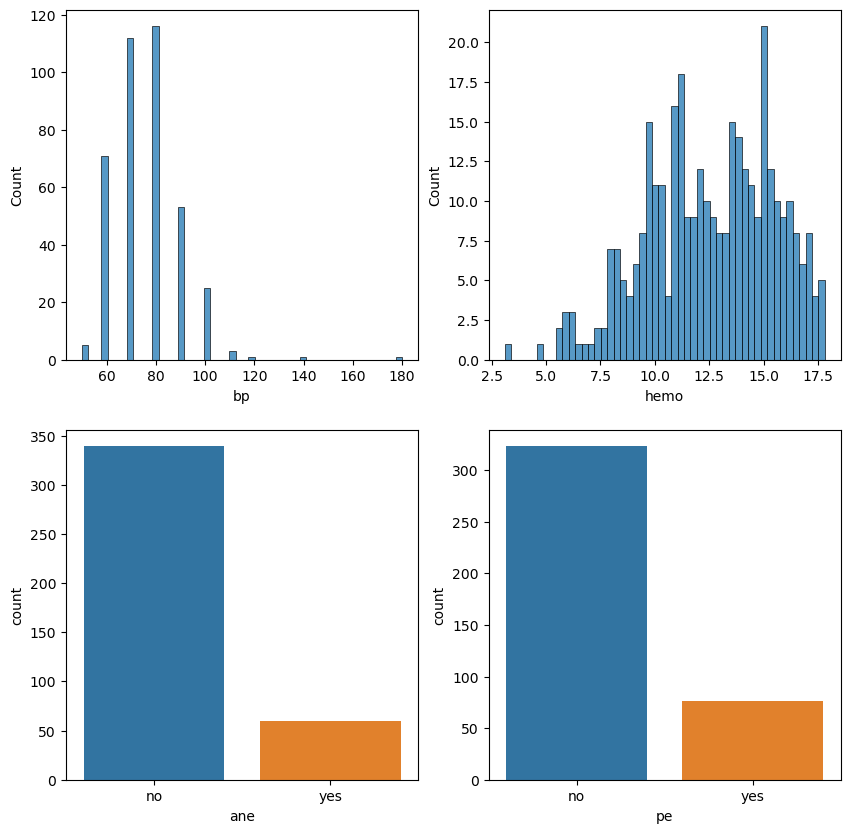

In [10]:
# check distribution in features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(x='bp', data=kidney, bins=50, ax=axes[0][0])
sns.histplot(x='hemo', data=kidney, bins=50, ax=axes[0][1])
sns.countplot(x='ane', data=kidney, ax=axes[1][0])
sns.countplot(x='pe', data=kidney, ax=axes[1][1]);

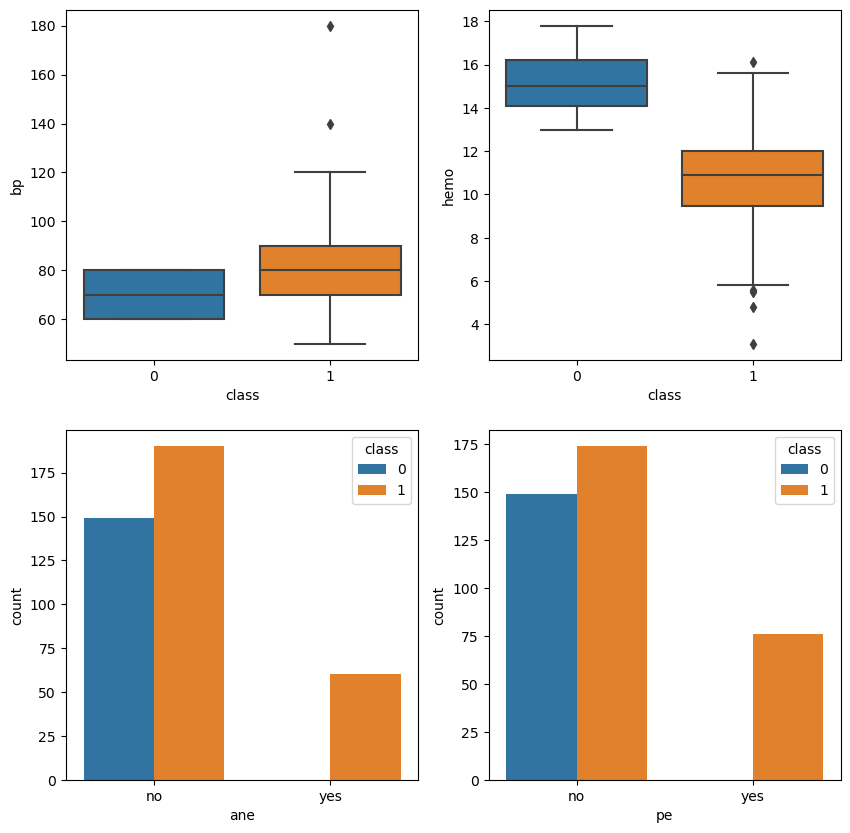

In [11]:
# check values in features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='class', y='bp', data=kidney, ax=axes[0][0])
sns.boxplot(x='class', y='hemo', data=kidney, ax=axes[0][1])
sns.countplot(x='ane', hue='class', data=kidney, ax=axes[1][0])
sns.countplot(x='pe', hue='class', data=kidney, ax=axes[1][1]);

In [12]:
# fill na bp and hemo columns with median
kidney['bp'].fillna(kidney['bp'].median(), inplace=True)
kidney['hemo'].fillna(kidney['hemo'].median(), inplace=True)

In [13]:
# find missing values in pe and ane columns
kidney[(kidney['ane'].isna()) & (kidney['pe'].isna())][['pe', 'ane']]

,pe,ane
294,NaN,NaN


In [14]:
# drop na in pe and ane columns
kidney.drop(294, inplace=True)

In [15]:
# check missing value in features
kidney[['bp', 'ane', 'hemo', 'pe']].isna().sum()

bp      0
ane     0
hemo    0
pe      0
dtype: int64

In [16]:
# check values
kidney[['bp', 'ane', 'hemo', 'pe']].head()

,bp,ane,hemo,pe
0,80.0,no,15.4,no
1,50.0,no,11.3,no
2,80.0,yes,9.6,no
3,70.0,yes,11.2,yes
4,80.0,no,11.6,no


In [17]:
# change values in ane and pe to 0 and 1
for col in ['ane', 'pe']:
    kidney[col] = kidney[col].map({'yes': 1, 'no':0})

In [18]:
# check values after change
kidney['ane'].value_counts()

0    339
1     60
Name: ane, dtype: int64

In [19]:
# create features and target
X = kidney[['bp', 'ane', 'hemo', 'pe']]
y = kidney['class']

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [21]:
# standardize
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
# instanctiate logistic regression and train model
logreg = LogisticRegression(penalty='none')
logreg.fit(X_train_sc, y_train)

LogisticRegression(penalty='none')

In [23]:
# features name and coefficient
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logreg.coef_[0]})

,Feature,Coefficients
0,bp,1.348647
1,ane,3.635488
2,hemo,-5.558245
3,pe,6.622491


In [24]:
y_preds = logreg.predict(X_test_sc)

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [25]:
# 1 unit of hemo will result in CKD decrease chance -5.558 in log odds.
# If got high hemo will decrease chance of CKD.

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [26]:
# pe will will result in CKD increase chance 6.622 in  log odds.
# If got pe will increase chance of CKD.

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:
1. Logistic regression have ability to interpret what features increase or decrease chance of what we interested.
2. Logistic regression also powerful in predict classification when what we will predict 0 and 1.

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

It make sense when generate confusion matrix on test data for compare true and predict target.

In [27]:
# Baseline score
y.value_counts(normalize=True) * 100

1    62.656642
0    37.343358
Name: class, dtype: float64

In [28]:
# confusion matrix
metrics.confusion_matrix(y_test, y_preds)

array([[35,  2],
       [ 4, 59]], dtype=int64)

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: optimize sensitivity for minimize the **False Negative** because if we predict that patients aren't have CKD but in reality they have. it have a cost more than predict patients who are have CKD but in reality they don't have.
Because if we predict a lot of **False Negative** it mean life of the patients.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

In [29]:
# create function roc curve
def roc_curve(X_test, y_test):
    # instantiate logreg and train model
    logreg = LogisticRegression(penalty='none')
    logreg.fit(X_test, y_test)
    
    # create empty list for store sensitivity and 1-specificity
    sensitivity_li = []
    one_minus_specificity_li = []
    
    # create df that store prob 
    y_pp = pd.DataFrame(logreg.predict_proba(X_test), 
                    columns=['class_0', 'class_1'])
    
    # loop thershold from 0 to 1
    for i in np.linspace(0, 1, 200):
        preds = [1 if x >= i else 0 for x in y_pp['class_1'].values]
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds).ravel()
        sensitivity = tp / (tp+fn)
        specificity = tn / (tn+fp)
        sensitivity_li.append(sensitivity)
        one_minus_specificity_li.append(1 - specificity)
    
    # plot roc curve
    plt.plot(one_minus_specificity_li, sensitivity_li)
    plt.plot([0,1], [0,1], label='baseline', linestyle='--')
    plt.legend();

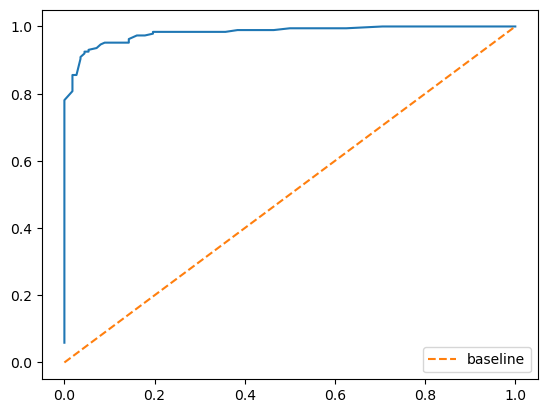

In [30]:
# roc curve for train data`
roc_curve(X_train_sc, y_train)

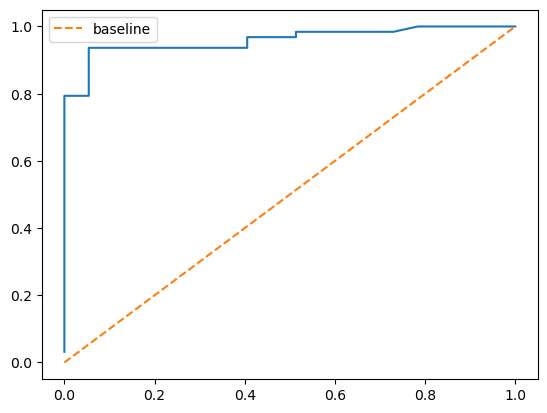

In [31]:
# roc curve for test data`
roc_curve(X_test_sc, y_test)

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: 
1. Unbalanced classes cause a problem because it not suit for train model, majority class will bias to model and make model predict well only majority class.
2. No Because CKD data are quite balance which CKD are 62% and not CKD are 37% 

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: Unbalanced data will give bias to model which will work well only majority class.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [32]:
# create sample that contain only class 1
kidney_sample = kidney[kidney['class'] ==1].sample(n=200_000, replace=True, random_state=22)

# concat df
kidney_unba = pd.concat([kidney, kidney_sample])

In [33]:
# count values in class
kidney_unba['class'].value_counts(normalize=True)*100

1    99.925648
0     0.074352
Name: class, dtype: float64

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [34]:
# create X, y from unbalanced data
X = kidney_unba[['bp', 'ane', 'hemo', 'pe']]
y = kidney_unba['class']

In [35]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)

In [36]:
# check porpotion in y_train
y_train.value_counts(normalize=True)

1    0.999255
0    0.000745
Name: class, dtype: float64

In [37]:
# check porpotion in y_test
y_test.value_counts(normalize=True)

1    0.999261
0    0.000739
Name: class, dtype: float64

In [38]:
# instantiate model and train model
logreg_unba = LogisticRegression(penalty='none')
logreg_unba.fit(X_train, y_train)

# score model with train data
metrics.confusion_matrix(y_train, logreg_unba.predict(X_train))

array([[     1,    111],
       [     0, 150187]], dtype=int64)

In [39]:
# score model train data with specificity
tn, fp, fn, tp = metrics.confusion_matrix(y_train, logreg_unba.predict(X_train)).ravel()
specificity = tn / (tn+fp)
specificity

0.008928571428571428

In [40]:
# score model with test data
metrics.confusion_matrix(y_test, logreg_unba.predict(X_test))

array([[    1,    36],
       [    0, 50063]], dtype=int64)

In [41]:
# score model test data with specificity
tn, fp, fn, tp = metrics.confusion_matrix(y_test, logreg_unba.predict(X_test)).ravel()
specificity = tn / (tn+fp)
specificity

0.02702702702702703

From CKD 99% and not CKD 1% dataset lead model to can't predicted the not CKD

**Unbalanced Data** will cause model know or predict almost every features with majority class. <br>
So, we need collect data that balanced or almost for make model know the pattern.

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!